In [92]:
# TITANIC competition
# Manuel Fernandez de Mendieta, May 2023

# Predecir quien sobrevive [1] y quien no [0] partiendo de los datos de entrenamiento.

Importo las librerias necesarias para poder desarrollar el proyecto

In [134]:
# data analysis and wrangling:
import pandas as pd
import numpy as np
#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
# conjunto de entrenamiento
from sklearn.model_selection import train_test_split
# evaluacion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Importo ambos datasets. utilizo combine para realizar modificaciones en ambos dataset al mismo tiempo (modificar o eliminar un campo)

In [94]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
combine = [train_df, test_df]

In [151]:
test_2 = pd.read_csv("/kaggle/input/titanic/test.csv")

1. Debo conocer que informacion contienen los dataset: </br>
    -> nombre de las columnas </br>
    -> tipo de dato de cada columna </br>
    -> registros con datos faltantes

In [95]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Detalle de las columnas:
* PassengerId = Id de cada pasajero
* Survived = Es el campo a predecir. [0: no sebrevivio, 1: sobrevivio]
* Pclass = Clase en la cual viajaba el pasajero [1:1ra, 2:2da, 3:3ra]
* Name = Nombre y apellido del pasajero/a
* Sex = sexo [female, male]
* Age = edad
* SibSp = # de hermanos/conyugues
* Parch = # de padres/hijos
* Ticket = #Id del ticket.
* Fare = Tarifa: precio del ticket
* Cabin = # de cabina, Id de la habitacion
* Embarked = en que puerto se embarco el pasajero [S: Southampton, Q:Queenstown, C:Cherbourg]

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Que campos son categoricos y cuales numericos? </br>
* Categoricos: Survived, Sex, Embarked. Ordinales: PClass
* Numericos: Age, Fare, SibSp, Parch.
* Mixtos: Ticket, Cabin.

### Valores faltantes train_df:
* Age: 177
* Cabin: 687
* Embarked: 2

### Valores faltantes test_df:
* Age: 86
* Fare: 1
* Cabin: 327

In [98]:
train_df.describe()  #campos numericos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Se pueden observar distintos datos:
- sobrevivio el 38.3% de los pasajeros 
- la edad promedio es de 30 años
- hay muy poca cantidad de gente mayor y gran cantidad de gente joven
- mas de la mitad de la gente viajaba sola

In [99]:
train_df.describe(include=['O']) #campos no numericos

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Analizando mediante "pivoting features"

In [100]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Podemos observar que hay una relacion entre clase donde viajaba el pasajero y sus probabilidades de sobrevivir

In [101]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Aca tambien podemos ver una relacion, el sexo femenino tuvo mayor porcentaje de sobrevivientes que el masculino.

In [102]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [103]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


En ambos casos podemos ver que a mayor cantidad de parientes, menor es la probabilidad de sobrevivir. pero tambien es llamativo que la gente que viajaba sola tiene un % menor al 35.

### Que sucede si sumamos los valores de las dos columnas? 

In [104]:
parientes = pd.DataFrame({'Parientes': (train_df['SibSp'] + train_df['Parch']), 'Survived': train_df['Survived']})
parientes[['Parientes', 'Survived']].groupby(['Parientes'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parientes,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


### Analizando mediante plots

Primero separamos las columnas que tienen valores numericos y las que tienen valores categoricos:

In [105]:
num_df = train_df [['Age', 'SibSp', 'Parch', 'Fare']]
cat_df = train_df [['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

Variables numericas:

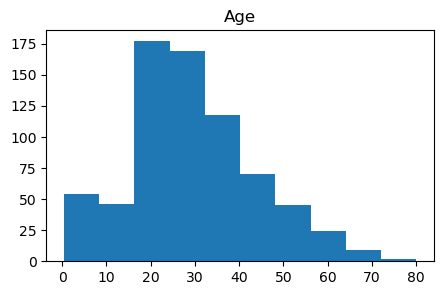

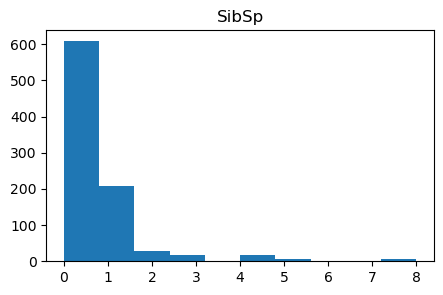

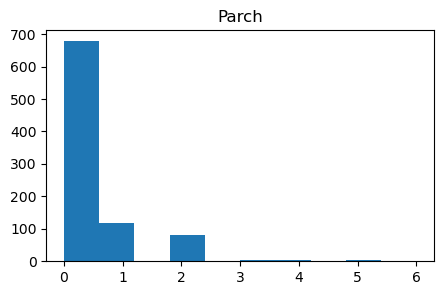

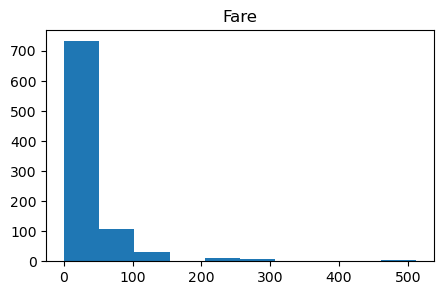

In [106]:
# Distribucion de las variables numericas:
for i in num_df:
    plt.subplots(figsize=(5, 3))
    plt.hist(num_df[i])
    plt.title(i)
    plt.show()

Vemos la correlacion entre las variables numericas:

<AxesSubplot:>

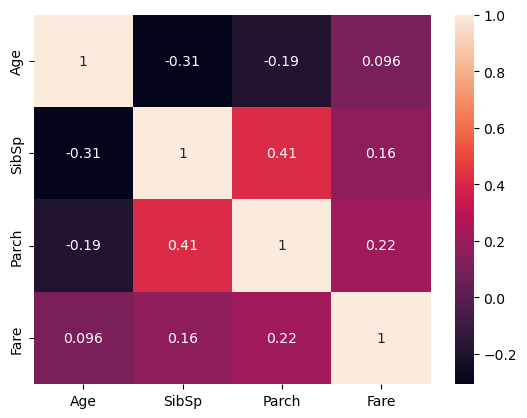

In [107]:
df_corr = num_df.corr(method= "pearson")    #devuelve una matriz con todas las correlaciones entre los distintos atributos
sns.heatmap(df_corr, annot=True)

Como era de esperarse, debido a la relacion de las columnas, hay una correlacion entre SibSp y Parch (ambos hacen referencia a la familia)

Variables categoricas

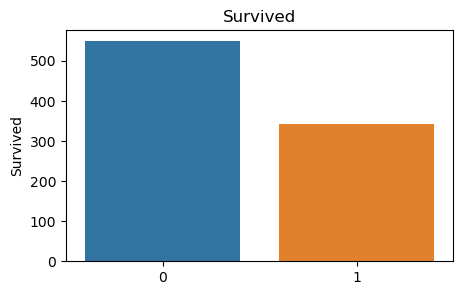

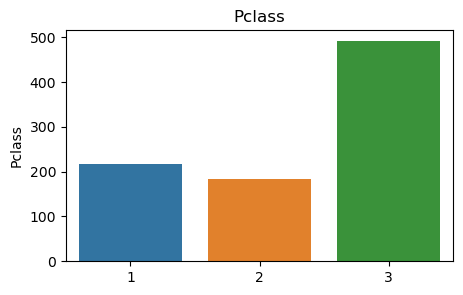

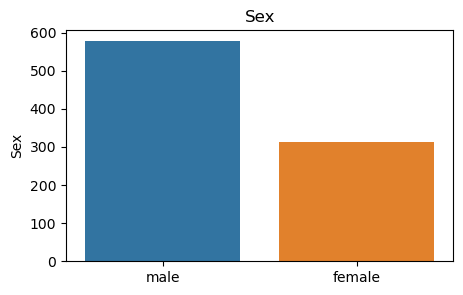

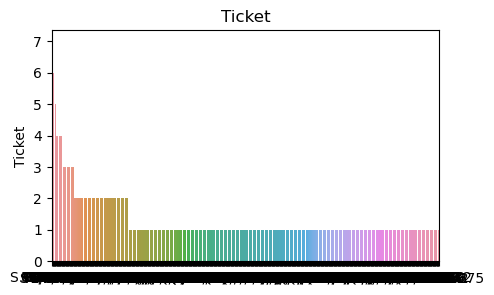

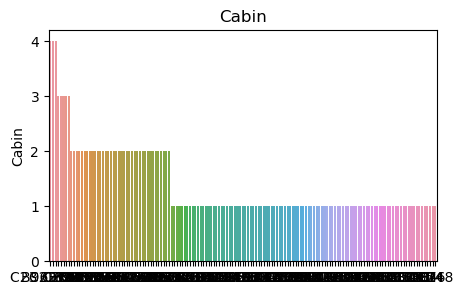

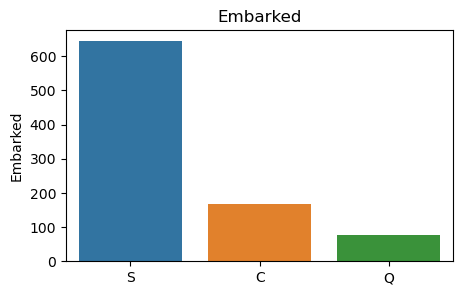

In [108]:
for i in cat_df.columns:
    plt.subplots(figsize=(5, 3))
    sns.barplot(x = cat_df[i].value_counts().index, y = cat_df[i].value_counts()).set_title(i)
    plt.show()

OBS: los plots de Tickets y Cabin no son de ayuda, ya que los valores de los campos no se repiten y el metodo value_counts() no los puede agrupar

Represento en tablas pivot las categorias PClass, Sex y Embarked comparandolas con el campo Survived

In [109]:
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Data Wrangling
Se eliminaran las columnas que se creen que no aportan a la solucion, ya sea por la informacion que contienen o por su calidad (datos faltantes).
Tambien se transformaran campos en nuevos que representen mejor la informacion que contienen. (get_dummies)

In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


opto por eliminar los siguientes campos:
* PassengerId
* Name: creo que con los datos del sexo y la edad, esta info no aporta nada nuevo
* Ticket: Es un tipo de dato dificil de extraerle info y no pienso que contengo informacion importante
* Cabin: Posee varios valores nulos.

In [111]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace =True)
test_df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace =True)

Debo reemplazar los valores faltantes!

    Age: Reemplazo los valores nulos por la edad promedio. 
        Otra manera seria reemplazarla en funcion de el valor de otras variables pero no hay correlacion fuerte con ningun otro campo numerico.
    Embarked: Son solo 2 valores nulos, los reemplazo por el puerto con mas apariciones



In [112]:
# Edad
edad_promedio = round(train_df['Age'].mean())
train_df['Age'].fillna(edad_promedio, inplace=True)
test_df['Age'].fillna(edad_promedio, inplace=True)

In [113]:
# Embarked
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Reemplazo los valores nulos por el Puerto S.

In [114]:
train_df['Embarked'].fillna('S', inplace=True)

In [115]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


En el dataframe test_df hay un valor nulo en el campo Fare, lo reemplazo por el promedio

In [116]:
promedio_fare = round(test_df['Fare'].mean(), 1)
test_df.fillna(promedio_fare, inplace=True)

In [117]:
train_df.max()

Survived           1
Pclass             3
Sex             male
Age             80.0
SibSp              8
Parch              6
Fare        512.3292
Embarked           S
dtype: object

### convierto a numericas las caracteristicas que no lo son
* Sex
* Embarked

In [118]:
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype('int')
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype('int')

test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype('int')
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype('int')

In [119]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


Normalizo (min-max) los campos Age y Fare para que todas las carateristicas se encuentren en rangos similares, beneficiando al entrenamiento del modelo.

In [120]:
age_min = train_df['Age'].min()
age_max = train_df['Age'].max()
fare_min = train_df['Fare'].min()
fare_max = train_df['Fare'].max()

train_df['Age'] = train_df['Age'] / (age_max-age_min)
train_df['Age']
train_df['Fare'] = train_df['Fare'] / (fare_max-fare_min)
train_df['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

In [128]:
test_df['Age'] = test_df['Age'] / (age_max-age_min)
test_df['Fare'] = test_df['Fare'] / (fare_max-fare_min)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.433526,0,0,0.015282,1
1,3,0,0.590601,1,0,0.013663,2
2,2,1,0.779090,0,0,0.018909,1
3,3,1,0.339281,0,0,0.016908,2
4,3,0,0.276451,1,1,0.023984,2
...,...,...,...,...,...,...,...
413,3,1,0.376979,0,0,0.015713,2
414,1,0,0.490073,0,0,0.212559,0
415,3,1,0.483790,0,0,0.014151,2
416,3,1,0.376979,0,0,0.015713,2


## MODEL, PREDICT & SOLVE

Este problema es de aprendizaje supervisado (ya que los datos de entrenamiento estan etiquetados) y es de clasificacion, ya que debemos predecir si la persona sobrevive o no [0, 1]. Los modelos de clasificacion son los siguientes:
* Naives Bayes
* Regresion logistica
* KNN: K Vecinos mas cercanos
* SVM: Support Vector Machines
* Decision tree
* Random forest

Para evaluar que modelo funciona mejor, utilizaremos el dataframe train_df para entrenar y evaluar cada modelo, ya que tengo los datos etiquetados. Una vez que sepamos que modelo es el mejor, se lo aplicaremos a los datos de test_df y enviaremos el resultado a la compatencia.

Primero, debemos dividir el dataframe de train en X e Y

In [136]:
x_train  = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

Para poder evaluar el desempeño de cada modelo, se utilizara validacion cruzada. El desempaño total sera el promedio de cada prueba.

### Naive Bayes

In [139]:
gnb = GaussianNB()
cv = cross_val_score(gnb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77094972 0.79213483 0.78651685 0.80337079 0.80337079]
0.7912685958194715


### Regresion Logistica

In [140]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.7752809  0.78089888 0.76966292 0.8258427 ]
0.7889962965287804


### KNN

In [141]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74301676 0.76966292 0.83146067 0.79775281 0.80337079]
0.7890527901575545


### SVM

In [143]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.80898876 0.79775281 0.80898876]
0.8103132257862031


### Decision Tree

In [145]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.75842697 0.80337079 0.73595506 0.80337079]
0.7710627079279393


### Random Forest

In [146]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77653631 0.80337079 0.84831461 0.78089888 0.84831461]
0.8114870378507313


## Resultados
    Naive Bayes: 79.13%
    Regresion Logistica: 78.90%
    KNN: 78.91%
    SVM: 81.03%
    Decision Tree: 77.10%
    Random Forest: 81.15%

Viendo los resultados, podemos observar que los dos mejores modelos son el SVM y Random Forest. Estos porcentajes podrian aumentar buscando los mejores parametros posibles del modelo, utilizando gridsearch.

Se utilizara el SVM para predecir el vector "Survived" de los datos de entrenamiento.

In [148]:
model_svm = SVC(kernel='rbf')
model_svm.fit(x_train, y_train)

yhat = model_svm.predict(test_df)

### Subo los resultados:

In [154]:
output = pd.DataFrame({'PassengerId': test_2['PassengerId'], 'Survived': yhat})
output.to_csv('submission.csv', index=False)

### Resultados:

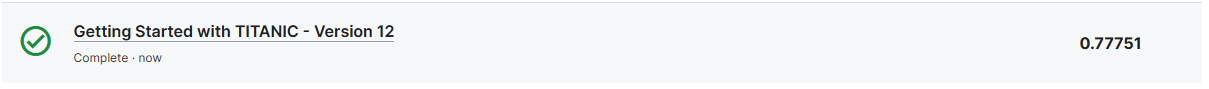